In [1]:
import matplotlib.pyplot as plt
import numpy as np

DIMS = (64, 64)
NF = 10 # number of features / parameters

In [2]:
from functions import rastrigin

image = np.zeros(DIMS, dtype=float)

x = np.zeros(2)

i_space = np.linspace(-5.12, 5.12, DIMS[0])
j_space = np.linspace(-5.12, 5.12, DIMS[1])

for i, xi in enumerate(i_space):
    for j, xj in enumerate(j_space):
        x[0], x[1] = xi, xj
        image[i][j] = rastrigin(x)


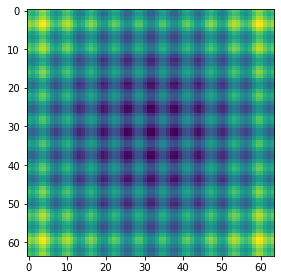

In [3]:
plt.imshow(image)
plt.tight_layout()
plt.show()

In [4]:
def sample_uniform(low, high, shape):
    return np.random.uniform(low, high, shape)


def evaluate(population, f=rastrigin):
    return 1.0 / (np.apply_along_axis(f, 2, population) + 1.0)


def plot_fitness(fitness):
    plt.imshow(fitness)
    plt.tight_layout()
    plt.show()

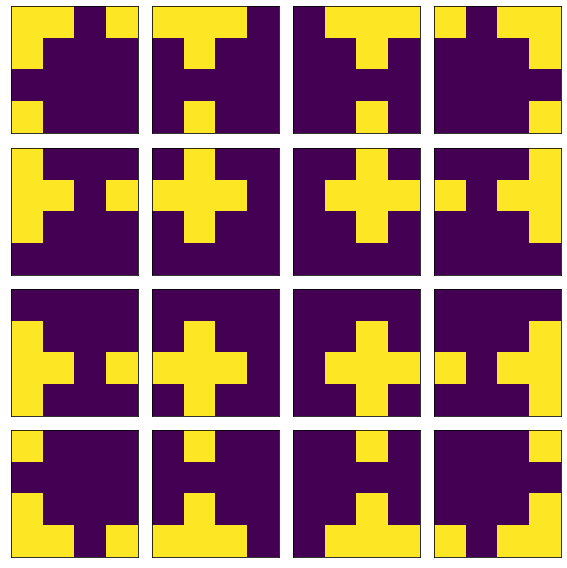

In [5]:
from operators import nhood_linear

def draw_nhood(image, nhood_idx):
    for idx in nhood_idx:
        x, y = idx
        image[x][y] = 1.0


fig, ax = plt.subplots(4, 4, figsize=(8, 8), subplot_kw={"xticks": (), "yticks": ()})

for i in range(4):
    for j in range(4):
        image = np.zeros((4, 4))
        nhood_idx = nhood_linear(i, j, (4, 4))
        draw_nhood(image, nhood_idx)
        ax[i][j].imshow(image)
fig.tight_layout()

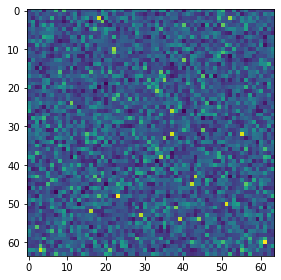

In [6]:
pop = sample_uniform(-5.12, 5.12, DIMS + (NF,))
fit = evaluate(pop)
plot_fitness(fit)

In [7]:
import time

from operators import mutate_gaussian
from operators import nhood_get, nhood_set
from operators import recomb_singlepoint
from operators import replace_always
from operators import select_linear, select_roulette

# n_steps = 1
# x_range = range(1)
# y_range = range(1)

n_steps = 200
x_range = range(DIMS[0])
y_range = range(DIMS[1])

pb_mutate = 0.1

metrics = {
    "min": np.zeros(n_steps),
    "max": np.zeros(n_steps),
    "avg": np.zeros(n_steps)
}

history = np.zeros((n_steps,) + DIMS)

for step in range(n_steps):
    start = time.time()
    pop_new = np.zeros_like(pop)
    
    for x in x_range:
        for y in y_range:
            nhood_idx        = list(nhood_linear(x, y, DIMS))
            nhood, nhood_fit = nhood_get(pop, fit, nhood_idx)

            a, b = select_linear(nhood, nhood_fit)
            # a = select_roulette(nhood, nhood_fit)
            c = recomb_singlepoint(nhood[a], nhood[b])
            p = np.random.random()
            if p < pb_mutate: c = np.clip(mutate_gaussian(c, sigma=0.001), -5.12, 5.12)
            pop_new[x][y] = c

    pop[:] = pop_new
    fit = evaluate(pop)
    history[step] = fit
    metrics["min"][step] = np.min(fit)
    metrics["max"][step] = np.max(fit)
    metrics["avg"][step] = np.mean(fit)   
    if (step + 1) % 10 == 0:
        end = time.time()
        print("step ({:3}) - {:.4f}s elapsed".format(step + 1, end - start))


step ( 10) - 0.9374s elapsed
step ( 20) - 0.6746s elapsed
step ( 30) - 0.5344s elapsed
step ( 40) - 0.4499s elapsed
step ( 50) - 0.7985s elapsed
step ( 60) - 1.3232s elapsed
step ( 70) - 0.6527s elapsed
step ( 80) - 0.8684s elapsed
step ( 90) - 0.6368s elapsed
step (100) - 1.1977s elapsed
step (110) - 0.5784s elapsed
step (120) - 0.6005s elapsed
step (130) - 0.5821s elapsed
step (140) - 0.9628s elapsed
step (150) - 0.5669s elapsed
step (160) - 0.5666s elapsed
step (170) - 0.7079s elapsed
step (180) - 0.4751s elapsed
step (190) - 0.7939s elapsed
step (200) - 0.6260s elapsed


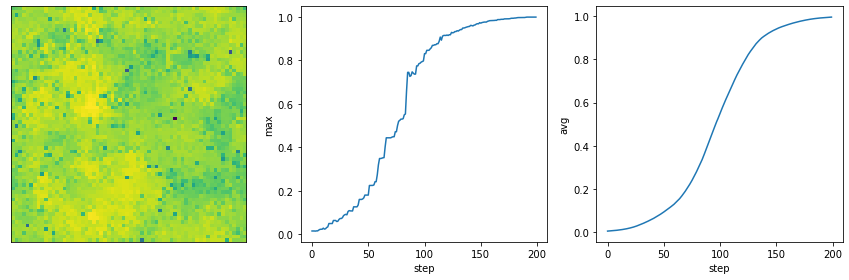

In [10]:
step_range = range(n_steps)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].imshow(fit)
ax[1].set_xlabel("step")
ax[1].set_ylabel("max")
ax[1].plot(step_range, metrics["max"])
ax[2].set_xlabel("step")
ax[2].set_ylabel("avg")
ax[2].plot(step_range, metrics["avg"])
fig.tight_layout()

In [11]:
from PIL import Image

frames = [Image.fromarray(255 * frame) for frame in history]
frames[0].save("cea.gif", save_all=True, append_images=frames[1:], duration=100, loop=0)